# Uderstanding Support Vector Machine


**Support Vector Machine (SVM)** is one of the most powerful out-of-the-box supervised machine learning algorithms. Unlike many other machine learning algorithms such as neural networks, you don’t have to do a lot of tweaks to obtain good results with SVM. What exactly is the problem SVM is trying to solve? How do we get the optimal hyperplane? How does SVM handle non-linearly separable data? Why use kernels? To fully understand the answers to these questions, we need to go under the hood and explore the mathematics behind SVMs and understand how they work.

In this section, we will develop the intuition behind support vector machines and their use in classification problems.

We begin with the standard imports:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

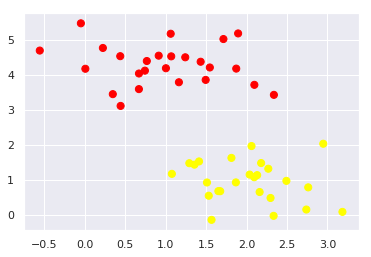

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:

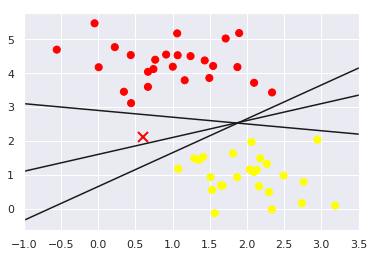

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label!

# Support Vector Machines: Maximizing the Margin


Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

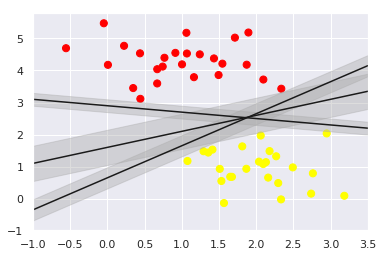

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model.

Now let's understand the mathematics behind Support Vector Machines. Let’s start with defining hyperplanes.


## Hyperplane

Then, the question arises when there are more than three dimensions. What do we use to separate the multi-dimensional data? We use hyperplane. How could we define a hyperplane?

Let’s look at the two-dimensional case first. The two-dimensional linearly separable data can be separated by a line. The function of the line is y=ax+b. We rename x with x1 and y with x2 and we get:

\begin{equation*}
ax_1-x_2+b=0
\end{equation*}

If we define x = (x1,x2) and w = (a,−1), we get:
    
\begin{equation*}
w\cdot x + b =0
\end{equation*}
    

This equation is derived from two-dimensional vectors. But in fact, it also works for any number of dimensions. This is the equation of the hyperplane.

# convex quadratic optimization problem

Once we have the hyperplane, we can then use the hyperplane to make predictions.

For a decision hyper-plane ${\bf x}^T {\bf w}+b=0$ to separate the two classes $P=\{({\bf x}_i,1)\}$ and $N=\{({\bf x}_i,-1)\}$ , We define the hypothesis function h as:

\begin{equation*}
% <![CDATA[
h(x_i) =
    \begin{cases}
    +1 & if \space {\bf x}_i^T{\bf w} +b \ge 0 \\
    -1 & if \space {\bf x}_i^T{\bf w} +b < 0
    \end{cases} %]]>
\end{equation*}

These can be combined into one inequality: 

\begin{equation*}y_i ({\bf w}\cdot{\bf x}_i +b) \ge 1,\;\;\;(i=1,\cdots,m) \end{equation*}

So basically, the goal of the SVM learning algorithm is to find a hyperplane (which means we need to find the values of w and b of the optimal hyperplane) that separates the two classes with the maximal margin (the distance between the decision plane and the closest sample points).

The optimal plane should be in the middle of the two classes, so that the distance from the plane to the closest point on either side is the same. We define two additional planes $H_+$ and $H_-$ that are parallel to $H_0$ and go through the point closest to the plane on either side ( called **support vectors** ):

\begin{equation*}
{\bf w}\cdot {\bf x_+}+b=1,\;\;\;\;\mbox{and}\;\;\;\;{\bf w}\cdot {\bf x}_-+b=-1
\end{equation*}

Now calculate Margin Width (M):

\begin{equation*}
M = \frac{({\bf x_+} - {\bf x_-})\cdot w}{||w||} = \frac{2}{||w||}
\end{equation*}

Our goal is to maximize this distance. This maximization problem is equivalent to the following minimization problem:

\begin{equation*}
\min_{w,b} \frac{1}{2}||w||^2 <br>
    subject \space to \space y_i(w\cdot x + b)-1\ge 0, i=1...m
\end{equation*}

The above statement is the SVM optimization problem. It is called a **convex quadratic optimization problem**.

#### To better visualize, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

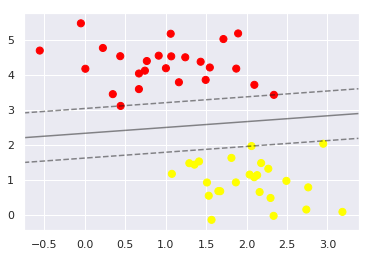

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin: they are indicated by the black circles in this figure are **support vectors**.

In Scikit-Learn, the identity of these points are stored in the support_vectors attribute of the classifier:

In [7]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

# Solving SVM optimization problem – Hard Margin SVM

We can restate the SVM optimization problem using the Lagrange multiplier method.

### SVM Lagrange problem

Lagrange stated that if we want to find the minimum of f under the equality constraint g, we just need to solve for:

\begin{equation*}\nabla f(x)-\alpha \nabla g(x)=0\end{equation*}

α  is called the **Lagrange multiplier**.

At a solution P:

1) The the constraint line g and the contour lines of f must be tangent

2) If they are tangent, their gradient vectors (perpendiculars) are parallel

3) Gradient of g must be 0 – i.e., steepest ascent & so perpendicular to f

4) Gradient of f must also be in the same direction as g



In terms of the SVM optimization problem,

\begin{equation*}f(w)=\frac{1}{2}\|w\|^2 \end{equation*}

\begin{equation*}g(w,b)=y_i(w\cdot x + b)-1, i=1...m\end{equation*}

The Lagrangian function is then:

\begin{equation*}\mathcal{L}(w,b,\alpha)=\frac{1}{2}\|w\|^2-\sum_{i=1}^{m}{\alpha_i[y_i(w\cdot x + b)-1]}\end{equation*}

Because it is **quadratic**, the surface is a paraboloid, with just a **single global minimum** (thus avoiding a problem we had with neural nets!)

Equivalently, we need to solve the following Lagrangian primal problem:

\begin{equation*}min_{w,b}\space \max \mathcal{L}(w,b,\alpha)\end{equation*}

\begin{equation*}subject \space to \space \alpha_i \ge 0, i=1...m\end{equation*}



There is an α for each example, we need to maximize **L(w,b,α)** for all examples. And there is a (w,b) for each hyperplane, we need to minimize the **maxL(w,b,α)** in the meantime.

Since w , α and β satisfy the **Karush-Kuhn-Tucker (KKT) conditions**, it is also a solution to the primal and dual problems.



### Wolfe dual problem

Let’s see what the dual problem is for the above primal problem.

The Lagrangian function is:

\begin{equation*}\mathcal{L}(w,b,\alpha)=\frac{1}{2}w\cdot w-\sum_{i=1}^{m}{\alpha_i[y_i(w\cdot x + b)-1]}\end{equation*}

For the dual problem, we have that:

\begin{equation*}\nabla_w \mathcal{L}(w,b,\alpha) = w - \sum_{i=1}^{m}{\alpha_iy_ix_i}=0\end{equation*}

\begin{equation*}\nabla_b \mathcal{L}(w,b,\alpha) = -\sum_{i=1}^{m}{\alpha_iy_i}=0\end{equation*}

From the above two equations, we get $ w=\sum_{i=1}^{m}{\alpha_iy_ix_i} $ and $ \sum_{i=1}^{m}{\alpha_iy_i}=0 $. We substitute them into the Lagrangian function L and get:

\begin{equation*}W(\alpha,b)= \sum_{i=1}^m\alpha_i -\frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m\alpha_i\alpha_jy_iy_jx_i\cdot x_j\end{equation*}

The dual problem is thus stated as:

\begin{equation*}\max_\alpha \sum_{i=1}^m\alpha_i -\frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m\alpha_i\alpha_jy_iy_jx_i\cdot x_j\end{equation*}

\begin{equation*}subject\space to\space \alpha_i \ge 0, i=1...m, \sum_{i=1}^m{a_iy_i}=0\end{equation*}

The **advantage of the Wolfe dual problem** over the Lagrange primal problem is that the objective function now only depends on the Lagrangian multipliers, which is easier to be solved analytically and this will let us solve the problem by computing the just the inner products of $ x_i , x_j $ (which will be very important later on when we want to solve non-linearly separable classification problems)

The **SMO (sequential minimal optimization) algorithm**, gives an efficient way of solving the Wolfe dual problem.

# Classifier

After we solve the Wolfe dual problem, we obtain a vector of α containing the Lagrangian multiplier value for every example. We can then proceed to compute w and b, which determines the optimal hyperplane.

According to the equation above:

\begin{equation*}w - \sum_{i=1}^{m}{\alpha_iy_ix_i}=0
\end{equation*}

We get:

\begin{equation*}w = \sum_{i=1}^{m}{\alpha_iy_ix_i}
\end{equation*}

To compute the value of b, we got:

\begin{equation*}y_i(w\cdot x^\star + b)-1 =0
\end{equation*}

where $ x^\star$ are support vectors. We multiply both sides by $y_i$ and we know $y^2_i=1$. We get:

\begin{equation*}b = y_i - w\cdot x^\star\end{equation*}

Thus, we could compute b as:

\begin{equation*}b = \frac{1}{S}\sum_{i=1}^S(y_i-w\cdot x)\end{equation*}

S is the number of support vectors.

Once we have the hyperplane, we can then use the hyperplane to make predictions. The hypothesis function h is:
    
\begin{equation*}
% <![CDATA[
h(x_i) =
    \begin{cases}
    +1 & if \space {\bf w}\cdot{\bf x}_i +b \ge 0 \\
    -1 & if \space {\bf w}\cdot{\bf x}_i +b < 0
    \end{cases} %]]>
\end{equation*}

# Solving SVM optimization problem – Soft Margin SVM

The problem with Hard Margin SVM is that it does not tolerate outliers. It does not work with non-linearly separable data because of outliers. The reason is that if you remember our initial optimization problem the constraints are $y_i(w\cdot x_i+b) \ge 1$ for each example. For the optimization problem to be solvable, all the constraints have to be satisfied. If there is an outlier example which makes the constraint not be satisfied, then the optimization will not be solvable. We’ll look at how Soft Margin SVM handles this problem.

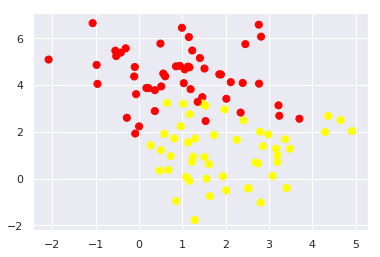

In [8]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

The idea is: for every data point $x_i$, we introduce a slack variable $\zeta_i$.

\begin{equation*}y_i(w\cdot x_i+b) \ge 1-\zeta_i, i=1...m\end{equation*}

Here, the left-hand side of the inequality could be thought of like the confidence of classification. Confidence score ≥ 1 suggests that classifier has classified the point correctly. However, if confidence score ≤ 1, it means that classifier did not classify the point correctly and incurring a linear penalty of $\zeta_i$.  
In this equation, slack variables $\zeta_i⩾0$ can be any positive numbers. There is no upper bound. However, we should minimize the error and that brings us to the first estimate of their value:

\begin{equation*}\zeta_i = max(0,1-y_i(w\cdot x_i+b))\end{equation*}

where the right hand side is also called the **Hinge loss function**. The next step is to find a hyperplane that minimizes the collective Hinge loss. As you can see, it is optimal to have as many points as possible on the correct side of the marginal hyperplanes, because then $\zeta_i=0$. Further optimization tries to minimize the relative distance between the training point and the corresponding marginal hyperplane. The value of $\zeta_i$ is the distance of $x_i$ from the corresponding class’s margin if $x_i$ is on the wrong side of the margin, otherwise zero. Thus the points that are far away from the margin on the wrong side would get more penalty.

To make the algorithm work for non-linearly separable datasets as well as be less sensitive to outliers, we reformulate our optimization as follows:

\begin{equation*}\min_{w,b,\zeta} \frac{1}{2}||w||^2+C\sum_{i=1}^{m}\zeta_i\end{equation*}

\begin{equation*}subject \space to \space y_i(w\cdot x_i+b) \ge 1-\zeta_i, \zeta_i \ge 0,i=1...m\end{equation*}

Thus, examples are now permitted to have (functional) margin less than 1, and if an example has functional margin $1 − \zeta_i$ (with ζ > 0), we would pay a cost of the objective function being increased by $C\zeta_i$. Here C is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the training error. Using the variable C, we can then control the penalty for misclassification.As we said, it determines how important ζ should be. A smaller C emphasizes the importance of ζ and a larger C diminishes the importance of ζ. Large values of C correspond to large error penalties (tend to overfit the training data) and whereas we are less strict about misclassification errors (tends to emphasize the margin while ignoring the outliers in the training data) if we choose smaller values for C . We can use the parameter C to control the width of the margin. 

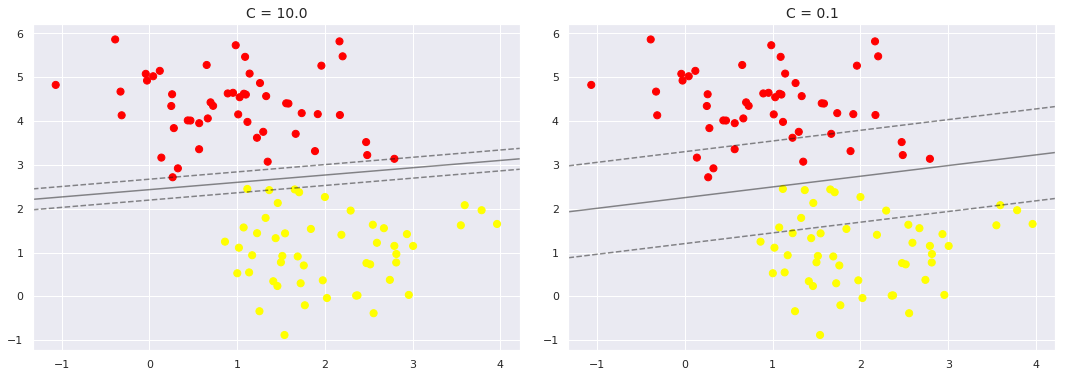

In [9]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Again, if we use Lagrange multipliers method like above, and we do all the hard math, the optimization problem could be transformed to a dual problem:

\begin{equation*}\max_\alpha \sum_{i=1}^m\alpha_i -\frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m\alpha_i\alpha_jy_iy_jx_i\cdot x_j\end{equation*}

\begin{equation*}subject\space to\space 0 \le \alpha_i \le C, i=1...m, \sum_{i=1}^m{a_iy_i}=0\end{equation*}

Here the constraint $\alpha_i \ge 0$ has been changed to $0\le \alpha_i \le C$.

# Solving nonlinear problems using a kernel SVM

Now, the Soft Margin SVM can handle the non-linearly separable data caused by noisy data. What if the non-linear separability is not caused by the noise? What if the data are characteristically non-linearly separable? we’ll talk about a technique called kernel trick to deal with this. first, let's look at some data that is not linearly separable:

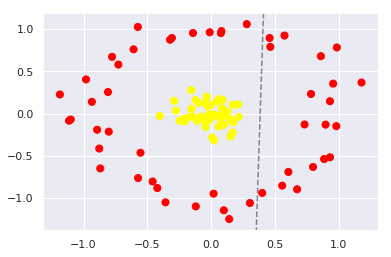

In [10]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In the above example, the original data is in 2-dimension. you would like to classify it using SVM. It looks like not possible because the data is not linearly separable. However, if we transform the two-dimensional data to a higher dimension, say, three-dimension or even ten-dimension, we would be able to find a hyperplane to separate the data. Suppose we denote it as, x = {x1,x2}.

$\phi(x) \rightarrow x^2_1,x^2_2,\sqrt{2}x_1x_2$ where, Φ is a transform function from 2-D to 3-D applied on x. We can now have a decision boundary in this 3-D space of Φ that will look like, $\beta_0+\beta_1x^2_1+\beta_2x^2_2+\beta_3\sqrt2x_1x_2=0$.   

The problem is, if we have a large dataset containing, say, millions of examples, the transformation will take a long time to run. If there is a function which could calculate the dot product and the result is the same as when we transform the data into higher dimension, it would be fantastic. This function is called a **kernel function**.

So, the kernel trick is: if you define a kernel function as $K(x_i,x_j)=\phi(x_i)^T\phi(x_j)$, we rewrite the Wolfe dual problem:

\begin{equation}\max_\alpha \sum_{i=1}^m\alpha_i -\frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m\alpha_i\alpha_jy_iy_jK(x_i\cdot x_j)\end{equation}

\begin{equation}subject\space to\space \alpha_i \ge 0, i=1...m, \sum_{i=1}^m{a_iy_i}=0\end{equation}

There are multiple kernel types we could use to classify the data. Some of the most popular ones are linear kernel, polynomial kernel, and RBF kernel.

The linear kernel is defined as:

$K(x_i, x_j) = x_i\cdot x_j$

The polynomial kernel is defined as:

$K(x_i, x_j) = (x_i\cdot x_j +c)^d$

The RBF kernel is defined as:

$K(x_i, x_j) = exp(-\gamma ||x_i-x_j||^2)$

The RBF (Radial Basis Function) kernel is also called the Gaussian kernel. It will result in a more complex decision boundary.In practice, it is recommended to try RBF kernel first cause it normally performs well.

\begin{equation}K(x_i,x_j)=\exp\left({-\frac{\|x_i-x_j\|_2^2}{2\sigma^2}}\right)=\phi(x_i)^T\phi(x_j)\end{equation}

\begin{equation}
      \phi(x) = e^{-x^2/2\sigma^2} \Big[ 1, \sqrt{\frac{1}{1!\sigma^2}}x,\sqrt{\frac{1}{2!\sigma^4}}x^2,\sqrt{\frac{1}{3!\sigma^6}}x^3,\ldots\Big]^T
    \end{equation}

Since the Gaussian has an infinite series expansion, we get terms of all orders till infinity. And, therefore, a Gaussian Kernel enables us to find similarity in infinite dimension. 

In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel, using the kernel model hyperparameter:

/home/abhi/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


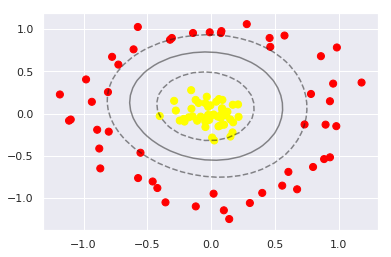

In [11]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary. 

I hope this is not a too long article for you to read and a too arcane explanation for you to understand the gist of SVM.